In [1]:
import pandas as pd
import numpy as np
import os
import sys

import librosa
import librosa.display
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
dataset = 'speech-emotion-recognition/Crema/'

In [3]:
#list files in directory using os.listdir
crema_directory_list = os.listdir(dataset)

print(crema_directory_list)


['1022_ITS_ANG_XX.wav', '1037_ITS_ANG_XX.wav', '1060_ITS_NEU_XX.wav', '1075_ITS_NEU_XX.wav', '1073_IOM_DIS_XX.wav', '1066_IOM_DIS_XX.wav', '1078_IWL_SAD_XX.wav', '1029_TAI_FEA_XX.wav', '1039_IEO_SAD_MD.wav', '1008_TAI_HAP_XX.wav', '1018_TSI_FEA_XX.wav', '1028_IEO_SAD_HI.wav', '1039_TSI_HAP_XX.wav', '1064_ITS_HAP_XX.wav', '1071_ITS_HAP_XX.wav', '1045_ITS_FEA_XX.wav', '1050_ITS_FEA_XX.wav', '1018_IWL_ANG_XX.wav', '1059_IEO_ANG_MD.wav', '1054_MTI_DIS_XX.wav', '1041_MTI_DIS_XX.wav', '1048_IEO_ANG_HI.wav', '1042_ITS_SAD_XX.wav', '1019_TAI_NEU_XX.wav', '1057_ITS_SAD_XX.wav', '1028_TSI_NEU_XX.wav', '1087_IOM_ANG_XX.wav', '1039_IEO_HAP_LO.wav', '1018_IEO_FEA_LO.wav', '1079_DFA_NEU_XX.wav', '1063_IWW_DIS_XX.wav', '1076_IWW_DIS_XX.wav', '1068_WSI_HAP_XX.wav', '1049_WSI_FEA_XX.wav', '1059_ITH_DIS_XX.wav', '1068_DFA_HAP_XX.wav', '1049_DFA_FEA_XX.wav', '1079_WSI_NEU_XX.wav', '1082_IWW_ANG_XX.wav', '1061_ITH_NEU_XX.wav', '1074_ITH_NEU_XX.wav', '1023_ITH_ANG_XX.wav', '1036_ITH_ANG_XX.wav', '1005_IEO_

In [4]:
emotions = []
file_paths = []

for audio_clip in crema_directory_list:
    # storing file paths
    file_paths.append(dataset + audio_clip)
    # storing file emotions
    part=audio_clip.split('_')
    if part[2] == 'SAD':
        emotions.append('sad')
    elif part[2] == 'ANG':
        emotions.append('angry')
    elif part[2] == 'DIS':
        emotions.append('disgust')
    elif part[2] == 'FEA':
        emotions.append('fear')
    elif part[2] == 'HAP':
        emotions.append('happy')
    elif part[2] == 'NEU':
        emotions.append('neutral')
    else:
        emotions.append('Unknown')
        
# creating dataframe for emotion of files
emotion_df = pd.DataFrame(emotions, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_paths, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()


,Emotions,Path
0,angry,speech-emotion-recognition/Crema/1022_ITS_ANG_...
1,angry,speech-emotion-recognition/Crema/1037_ITS_ANG_...
2,neutral,speech-emotion-recognition/Crema/1060_ITS_NEU_...
3,neutral,speech-emotion-recognition/Crema/1075_ITS_NEU_...
4,disgust,speech-emotion-recognition/Crema/1073_IOM_DIS_...


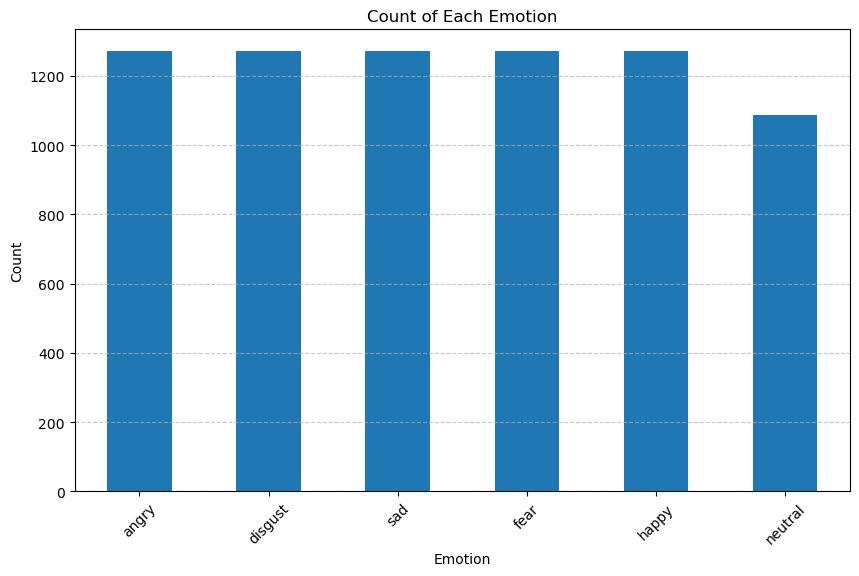

In [5]:
# Load the DataFrame from the CSV file if it's not already loaded
Crema_df.to_csv("Crema_df.csv")
# Plot the count of each emotion
emotion_counts = Crema_df['Emotions'].value_counts()
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.title('Count of Each Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
#Waveplots represent the loudness of the audio at a given time
#Method to create waveplots
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [7]:
#A spectrogram is a visual representation of the frequencies present in an audio signal over time, displaying the intensity of each frequency as it varies with time.
#Method to create spectrograms
def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

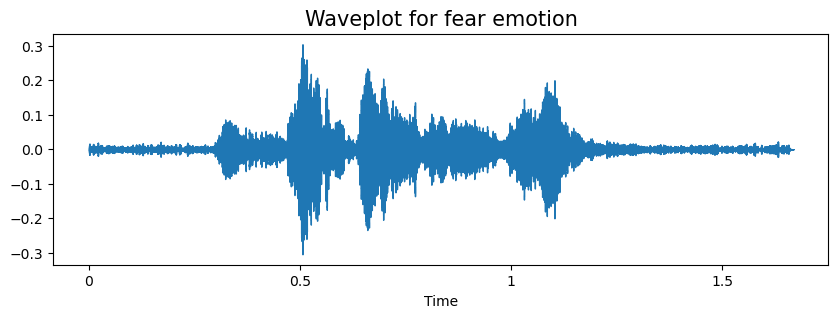

speech-emotion-recognition/Crema/1018_TSI_FEA_XX.wav


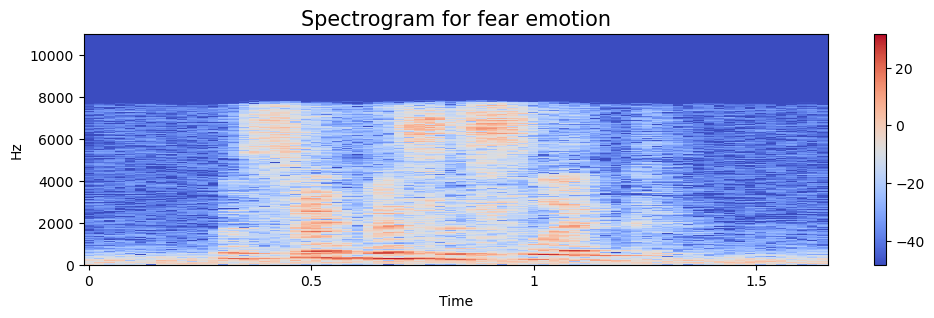

In [8]:
#Plotting waveplots and spectrograms for 'fear' emotion
emotion='fear'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)
print(path)

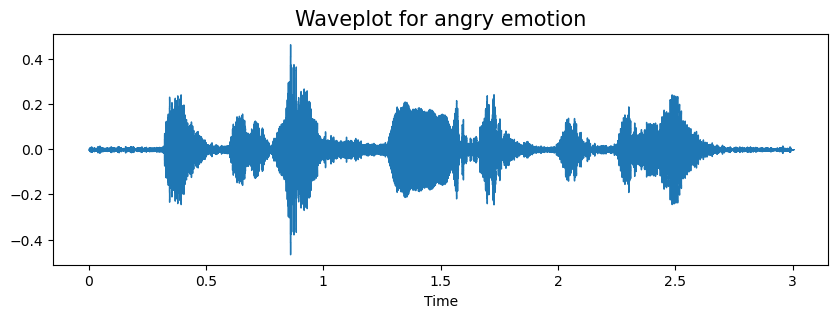

speech-emotion-recognition/Crema/1037_ITS_ANG_XX.wav


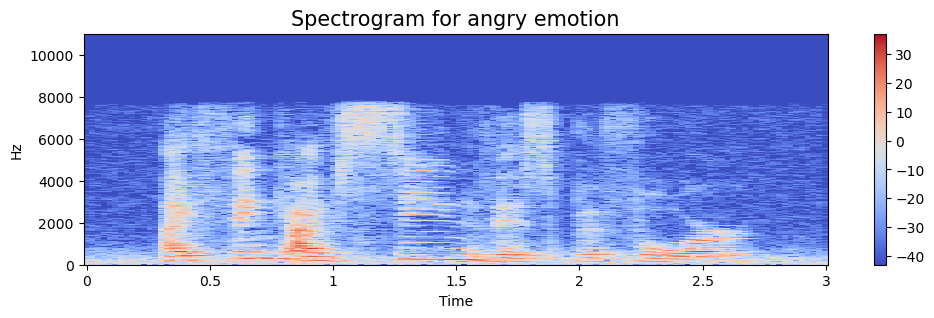

In [9]:
#Plotting waveplots and spectrograms for 'angry' emotion
emotion='angry'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)
print(path)

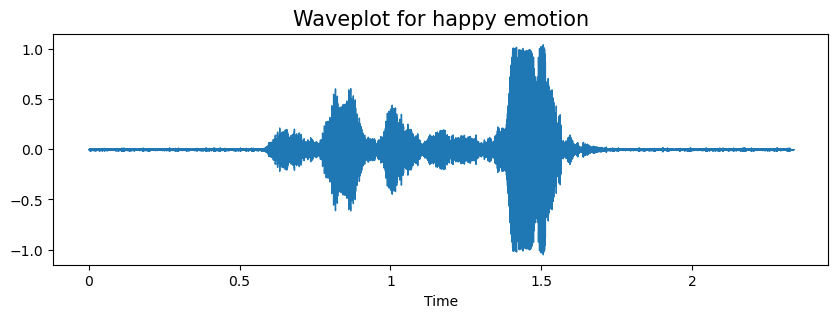

speech-emotion-recognition/Crema/1039_TSI_HAP_XX.wav


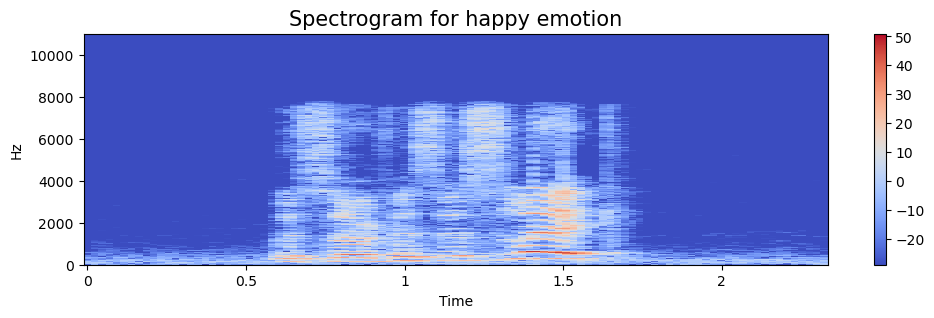

In [10]:
#Plotting waveplots and spectrograms for 'happy' emotion
emotion='happy'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)
print(path)

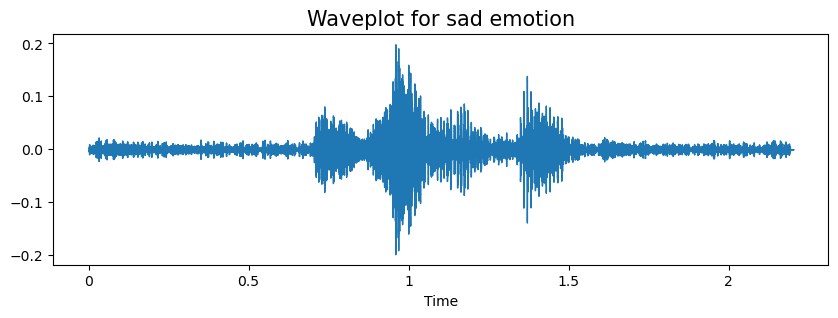

speech-emotion-recognition/Crema/1039_IEO_SAD_MD.wav


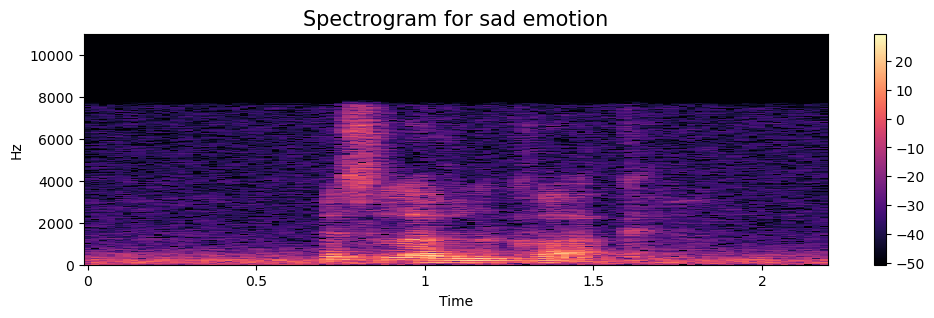

In [11]:
#Plotting waveplots and spectrograms for 'sad' emotion
emotion='sad'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)
print(path)

In [12]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(Crema_df.Path)[1]
data, sample_rate = librosa.load(path)

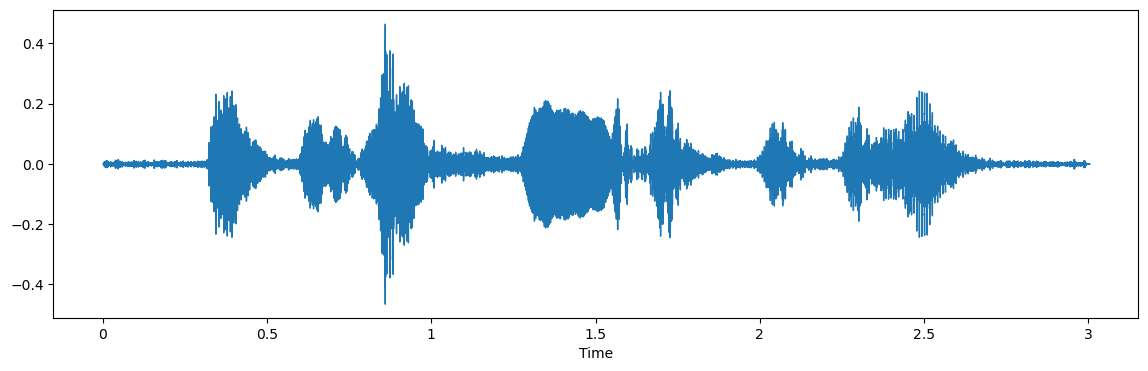

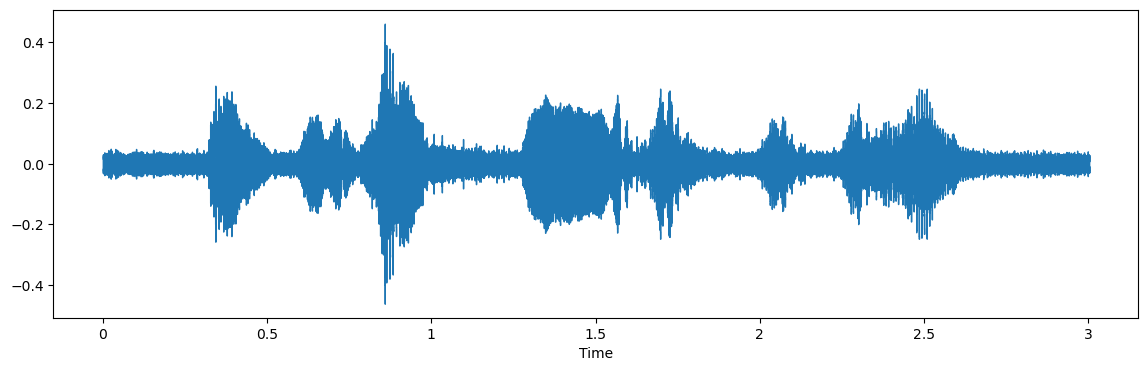

In [13]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [14]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with shift
    shift_data = shift(data)
    res3 = extract_features(shift_data)
    result = np.vstack((result, res3)) # stacking vertically
        
    
    return result

In [15]:
X, Y = [], []
for path, emotion in zip(Crema_df.Path, Crema_df.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

/Users/charithabhuma/anaconda3/lib/python3.11/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [16]:
len(X), len(Y), Crema_df.shape

(22326, 22326, (7442, 2))

In [17]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.100586,0.595252,0.551953,0.520970,0.469345,0.523831,0.499308,0.522859,0.581303,0.584585,...,3.271244e-08,3.422796e-08,3.566387e-08,3.696841e-08,3.813799e-08,3.918522e-08,4.004809e-08,4.072273e-08,4.113186e-08,angry
1,0.273138,0.718235,0.735087,0.703337,0.675255,0.704020,0.696024,0.611408,0.663136,0.635087,...,2.772857e-02,2.716401e-02,2.903347e-02,2.854646e-02,2.787262e-02,2.781208e-02,2.807657e-02,2.733082e-02,2.835251e-02,angry
2,0.101538,0.606510,0.559089,0.529795,0.481647,0.536394,0.513179,0.528772,0.585625,0.595564,...,1.402298e-07,1.397014e-07,1.394713e-07,1.392737e-07,1.391374e-07,1.391594e-07,1.391791e-07,1.392907e-07,1.393040e-07,angry
3,0.098154,0.591645,0.502407,0.504114,0.567158,0.523428,0.473053,0.553259,0.547363,0.501392,...,1.217806e-08,1.196992e-08,1.180550e-08,1.167072e-08,1.156799e-08,1.150221e-08,1.145568e-08,1.143314e-08,1.141620e-08,angry
4,0.249775,0.761131,0.693529,0.675797,0.740935,0.713279,0.590996,0.597543,0.631621,0.581885,...,1.305753e-02,1.292722e-02,1.217959e-02,1.271740e-02,1.268630e-02,1.295572e-02,1.287893e-02,1.224647e-02,1.244429e-02,angry


In [18]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
Y_decode = Features['labels'].values

In [19]:
Y

array(['angry', 'angry', 'angry', ..., 'neutral', 'neutral', 'neutral'],
      dtype=object)

In [20]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [21]:
Y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [22]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16744, 162), (16744, 6), (5582, 162), (5582, 6))

In [23]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16744, 162), (16744, 6), (5582, 162), (5582, 6))

In [24]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16744, 162, 1), (16744, 6), (5582, 162, 1), (5582, 6))

In [25]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1  (None, 81, 256)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 21, 128)           0

In [26]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
262/262 [==============================] - 17s 65ms/step - loss: 1.6062 - accuracy: 0.3138 - val_loss: 1.5027 - val_accuracy: 0.3585 - lr: 0.0010
Epoch 2/50
262/262 [==============================] - 17s 66ms/step - loss: 1.5265 - accuracy: 0.3571 - val_loss: 1.4660 - val_accuracy: 0.3938 - lr: 0.0010
Epoch 3/50
262/262 [==============================] - 18s 68ms/step - loss: 1.4856 - accuracy: 0.3806 - val_loss: 1.4421 - val_accuracy: 0.3819 - lr: 0.0010
Epoch 4/50
262/262 [==============================] - 18s 68ms/step - loss: 1.4498 - accuracy: 0.3981 - val_loss: 1.3808 - val_accuracy: 0.4282 - lr: 0.0010
Epoch 5/50
262/262 [==============================] - 18s 69ms/step - loss: 1.4275 - accuracy: 0.4062 - val_loss: 1.3752 - val_accuracy: 0.4409 - lr: 0.0010
Epoch 6/50
262/262 [==============================] - 18s 70ms/step - loss: 1.4014 - accuracy: 0.4239 - val_loss: 1.3650 - val_accuracy: 0.4332 - lr: 0.0010
Epoch 7/50
262/262 [==============================] - 18s 

175/175 [==============================] - 2s 10ms/step - loss: 1.0060 - accuracy: 0.6872
Accuracy of our model on test data :  68.7208890914917 %


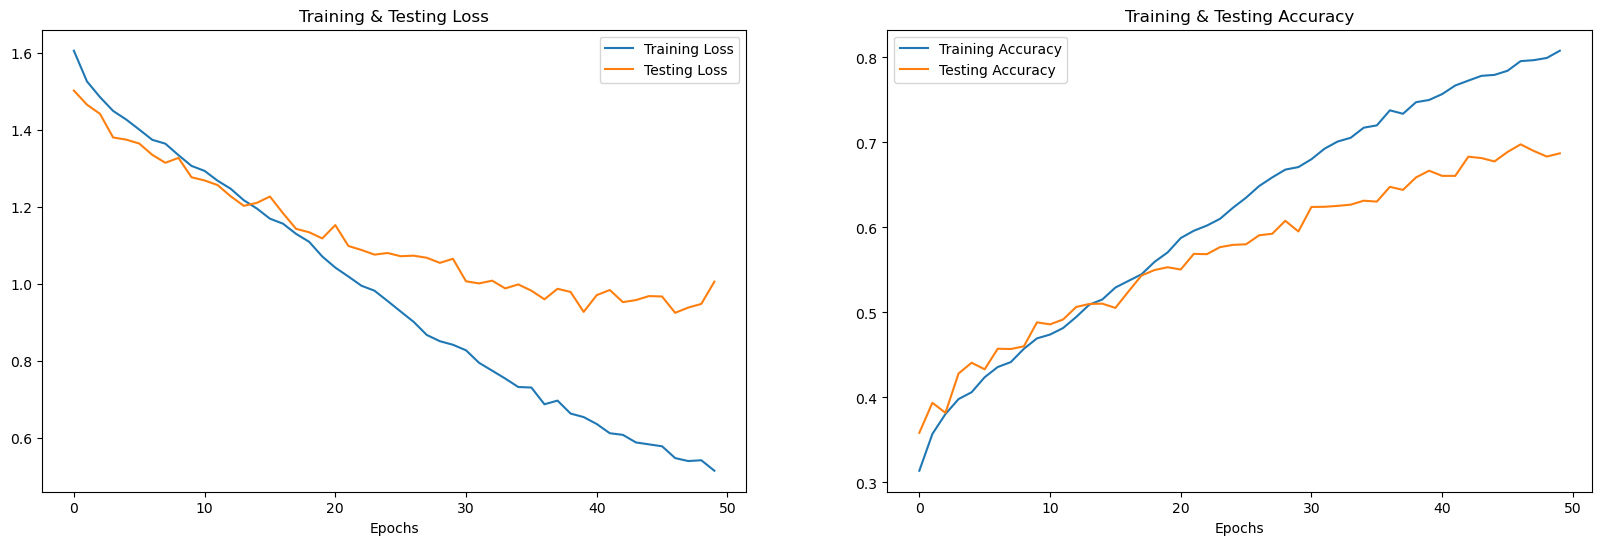

In [27]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


In [28]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

175/175 [==============================] - 2s 10ms/step


In [29]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,sad,sad
1,happy,angry
2,fear,sad
3,happy,happy
4,happy,happy
5,happy,happy
6,sad,sad
7,angry,angry
8,neutral,neutral
9,sad,fear


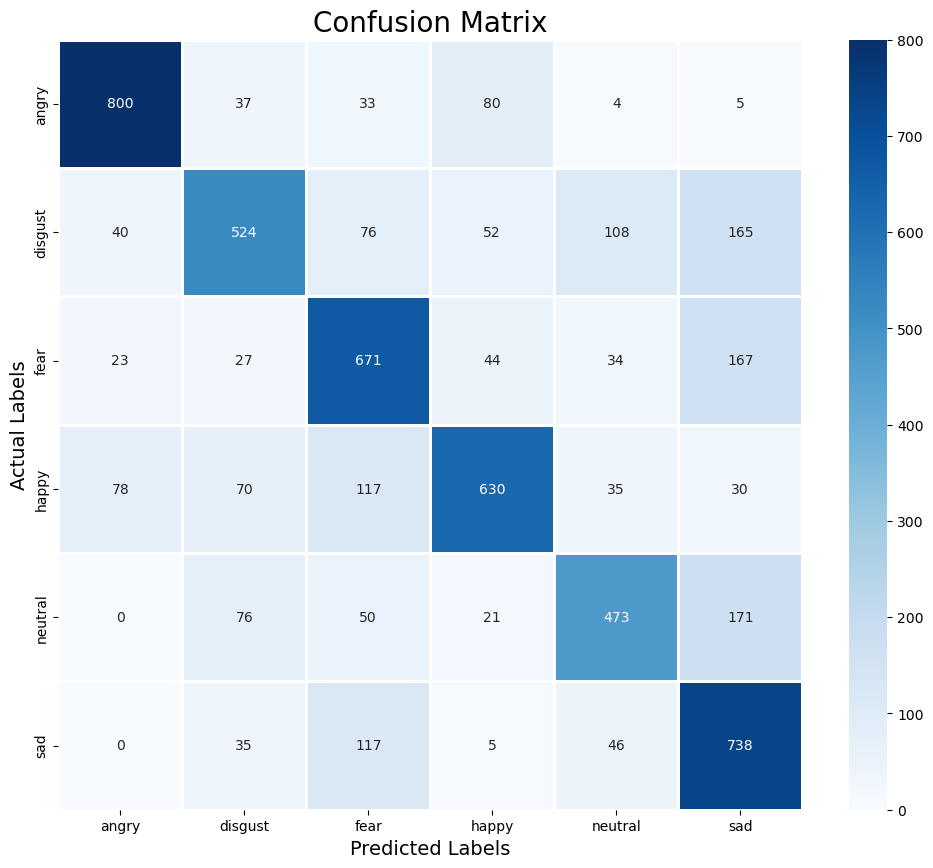

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.85      0.83      0.84       959
     disgust       0.68      0.54      0.60       965
        fear       0.63      0.69      0.66       966
       happy       0.76      0.66      0.70       960
     neutral       0.68      0.60      0.63       791
         sad       0.58      0.78      0.67       941

    accuracy                           0.69      5582
   macro avg       0.70      0.69      0.69      5582
weighted avg       0.70      0.69      0.69      5582



In [32]:
# Step 1: Data Preparation


x_train, x_test, y_train, y_test = train_test_split(X, Y_decode, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# Step 2: Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

# Step 3: Evaluate Model
rf_accuracy = rf_classifier.score(x_test, y_test)
print("Accuracy:", rf_accuracy)

# You can also calculate other metrics like confusion matrix and classification report
y_pred = rf_classifier.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.864206377642422
Confusion Matrix:
[[912  15   4  21   5   2]
 [ 38 804   3  29  43  48]
 [ 49  19 754  35  23  86]
 [ 61  35  18 803  27  16]
 [  2  31   5  17 698  38]
 [  2  21  28   5  32 853]]
Classification Report:
              precision    recall  f1-score   support

       angry       0.86      0.95      0.90       959
     disgust       0.87      0.83      0.85       965
        fear       0.93      0.78      0.85       966
       happy       0.88      0.84      0.86       960
     neutral       0.84      0.88      0.86       791
         sad       0.82      0.91      0.86       941

    accuracy                           0.86      5582
   macro avg       0.87      0.87      0.86      5582
weighted avg       0.87      0.86      0.86      5582



In [33]:
# Assuming X_train, X_test, y_train, y_test are already defined

# Step 2: Train a KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(x_train, y_train)

# Step 3: Evaluate Model
y_pred = knn_classifier.predict(x_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_accuracy)


Accuracy: 0.4184879971336439


In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with best parameters
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(x_train, y_train)

# Evaluate the model
knn_accuracy = best_knn_classifier.score(x_test, y_test)
print("Accuracy after hyperparameter tuning:", knn_accuracy)

# You can also calculate other metrics like confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy after hyperparameter tuning: 0.6995700465782874
Confusion Matrix:
[[644  93  72 113  26  11]
 [127 356 143 109 125 105]
 [143 182 290 103 101 147]
 [206 176 124 316  94  44]
 [ 37 178 111  88 269 108]
 [ 15 163 162  44  96 461]]
Classification Report:
              precision    recall  f1-score   support

       angry       0.55      0.67      0.60       959
     disgust       0.31      0.37      0.34       965
        fear       0.32      0.30      0.31       966
       happy       0.41      0.33      0.36       960
     neutral       0.38      0.34      0.36       791
         sad       0.53      0.49      0.51       941

    accuracy                           0.42      5582
   macro avg       0.42      0.42      0.41      5582
weighted avg       0.42      0.42      0.41      5582



In [39]:
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['Random Forest','CNN','KNN'])
tbl['Accuracy']=pd.Series([rf_accuracy*100,68.7208890914917,knn_accuracy*100])

tbl.set_index('Model')

,Accuracy
Model,
Random Forest,86.420638
CNN,68.720889
KNN,69.957005
